###  

### In this model Linear Regression model is used to Predict Car Prices. Steps:

### Understanding the Data and Check for Missing values if any
### Data Cleaning - Data Cleaning is the primmary step for any ML problem, if your data is not cleaned it will affect your model's accuracy
### Check Correlations
### Data Preparation - Make sure you don't have multicollinearity using Pearson-coeff and P_value
### Model Building and evaluation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk("D:\archive\CarPrice_Assignment.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### Reading the Data

In [4]:
df = pd.read_csv("D:\CarPrice_Assignment.csv")

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Checking Null values

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Data Cleaning

##### Data cleaning is required especially in 'Car Names' column. Because we have spelling mistakes in them, also same brands are written in different way like volkswagen is also written as vw. So, we have to correct them

In [8]:
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
len(df['CarName'].unique())

147

### I am using regular expression technique in replace method. This saves lot of time otherwise you have to write individually for each name to be replaced.

In [10]:
df['CarName'].replace(to_replace=r'alf.+', value='alfa', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'aud.+', value='audi', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'bmw.+', value='bmw', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'chev.+', value='chevrolet', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'dodge.+', value='dodge', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'hondci.+', value='civic', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'hondacc.+', value='accord', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'j.+', value='jaguar', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'isuz.+', value='isuzu', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'max.+', value='mazda', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'maz.+', value='mazda', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'buic.+', value='buick', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'mitsu.+', value='mitsubishi', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'N.+', value='nissan', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'niss.+', value='nissan', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'peug.+', value='peugeot', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'ply.+', value='plymouth', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'por.+', value='porsche', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'ren.+', value='renault', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'saab.+', value='saab', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'suba.+', value='subaru', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'toyota corol.+', value='toyota corolla', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'toyota coron.+', value='toyota corona', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'toyota cel.+', value='toyota celica', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'volk.+', value='volkswagen', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'voks.+', value='volkswagen', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'volv.+', value='volvo', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'vw.+', value='volkswagen', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'honda a.+', value='honda accord', regex=True, inplace=True),
df['CarName'].replace(to_replace=r'honda c.+', value='honda civic', regex=True, inplace=True),

(None,)

In [11]:
df['CarName'].unique()

array(['alfa', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda civic',
       'honda accord', 'honda prelude', 'isuzu', 'jaguar', 'mazda',
       'buick', 'mercury cougar', 'mitsubishi', 'nissan', 'peugeot',
       'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota corona', 'toyota corolla', 'toyota carina',
       'toyota mark ii', 'toyota celica', 'toyota starlet',
       'toyota tercel', 'toyota cressida', 'toyouta tercel', 'volkswagen',
       'volvo'], dtype=object)

In [12]:
len(df['CarName'].unique())

32

### Data Preparation

I will check Pearson Correlation to investigate the linear relationship between two continuous variables. If the features have a weak relationship with the price, I will drop from the dataset.

I will also check P-value to analyze the correlation is statistically significant or not. It is generally accepted that if the value is above 0.05, the correlation is not significant. If it is below 0.05, the correlation is significant.

In [13]:
from scipy import stats

num_columns = df.select_dtypes(exclude='object').columns

for i in list(num_columns):
    pearson_coeff, p_value = stats.pearsonr(df[i], df['price'])
    print(i.capitalize())
    print(f'Pearson Co-relation: {pearson_coeff}')
    print(f'P-Value: {p_value}')
    if p_value<0.05:
        print('Correlation is Significant')
    else:
        print('Correlation is Insignificant')
    print('')

Car_id
Pearson Co-relation: -0.10909333948229953
P-Value: 0.11945179263824951
Correlation is Insignificant

Symboling
Pearson Co-relation: -0.07997822464270347
P-Value: 0.25431175848636967
Correlation is Insignificant

Wheelbase
Pearson Co-relation: 0.57781559829215
P-Value: 1.1828204863378005e-19
Correlation is Significant

Carlength
Pearson Co-relation: 0.6829200156779622
P-Value: 1.6787066240746602e-29
Correlation is Significant

Carwidth
Pearson Co-relation: 0.7593252997415114
P-Value: 9.627437876120389e-40
Correlation is Significant

Carheight
Pearson Co-relation: 0.11933622657049443
P-Value: 0.08832832352275669
Correlation is Insignificant

Curbweight
Pearson Co-relation: 0.8353048793372966
P-Value: 1.2144448264032206e-54
Correlation is Significant

Enginesize
Pearson Co-relation: 0.8741448025245117
P-Value: 1.3547637598648421e-65
Correlation is Significant

Boreratio
Pearson Co-relation: 0.5531732367984437
P-Value: 7.907922278249421e-18
Correlation is Significant

Stroke
Pearson

In [14]:
drop = []
for i in list(num_columns):
    pearson_coeff, p_value = stats.pearsonr(df[i], df['price'])
    if p_value > 0.05:
        drop.append(i)

In [15]:
drop

['car_ID', 'symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm']

Symboling, Carheight, Stroke, Compressionratio, Peakrpm has a weak relationship with Price. The correlation between these variables and the price is not statistically significant. I will drop them from the dataset.

Wheelbase, Boreratio has a moderate relationship with Price. The correlation is statistically significant.

Carlength, Carwidth, Curbweight, Enginesize, Horsepower has a strong positive relationship with Price. The correlation is statistically significant.

Citympg, Highwaympg has a strong negative relationship with Price. The correlation is statistically significant.

In [16]:
df.drop(drop, axis=1, inplace=True)
df.drop('doornumber', axis=1, inplace=True)

In [17]:
df.shape

(205, 19)

I will add "cars category" column to the dataset according to car prices. I will group cars as budget friendly, medium range, expensive cars. I will drop "cars name" column as I will add "cars category" column.

In [18]:
data_new = df.copy()
cat_price = data_new.groupby('CarName')['price'].mean()

data_new = data_new.merge(cat_price.reset_index(), how = 'left', on = 'CarName')

bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','Expensive_Cars']

df['Category'] = pd.cut(data_new['price_y'], bins, right=False, labels=label)

I will convert categorical variables to numerical variables. Categorical variables in the dataset are nominal. I can apply OneHotEncoder.

In [19]:
df.drop('CarName', axis=1,  inplace=True)

In [20]:
column = ['fueltype','aspiration','carbody', 'drivewheel', 
          'enginelocation', 'enginetype','cylindernumber', 
          'fuelsystem', 'Category']
dummies = pd.get_dummies(df[column], drop_first = True)
df = pd.concat([df, dummies], axis = 1)
df.drop(column, axis = 1, inplace = True)

### Rescaling

Ordinary Least Squares method does not make normality assumptions about the data. It makes normality assumptions about the residuals. I will not transform the data to ensure Gaussian distribution.

On the other hand, linear regression is sensitive to outliers. Quantile Transformer is robust to outliers. It will transform the variables and handle the outliers in the dataset.

In [23]:
from sklearn.preprocessing import QuantileTransformer

transform = QuantileTransformer(n_quantiles=205)
columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight','enginesize',
           'boreratio','horsepower','citympg','highwaympg','price']
df[columns] = transform.fit_transform(df[columns])

In [24]:
print(df.columns.values)

['wheelbase' 'carlength' 'carwidth' 'curbweight' 'enginesize' 'boreratio'
 'horsepower' 'citympg' 'highwaympg' 'price' 'fueltype_gas'
 'aspiration_turbo' 'carbody_hardtop' 'carbody_hatchback' 'carbody_sedan'
 'carbody_wagon' 'drivewheel_fwd' 'drivewheel_rwd' 'enginelocation_rear'
 'enginetype_dohcv' 'enginetype_l' 'enginetype_ohc' 'enginetype_ohcf'
 'enginetype_ohcv' 'enginetype_rotor' 'cylindernumber_five'
 'cylindernumber_four' 'cylindernumber_six' 'cylindernumber_three'
 'cylindernumber_twelve' 'cylindernumber_two' 'fuelsystem_2bbl'
 'fuelsystem_4bbl' 'fuelsystem_idi' 'fuelsystem_mfi' 'fuelsystem_mpfi'
 'fuelsystem_spdi' 'fuelsystem_spfi' 'Category_Medium_Range'
 'Category_Expensive_Cars']


### Correlation Between Variables

Linear regression assumes the independent variables are not related with each other. If the correlation degree is high, it will cause problems when we fit the model.

To check multicollinearity, I will use heatmap and VIF.

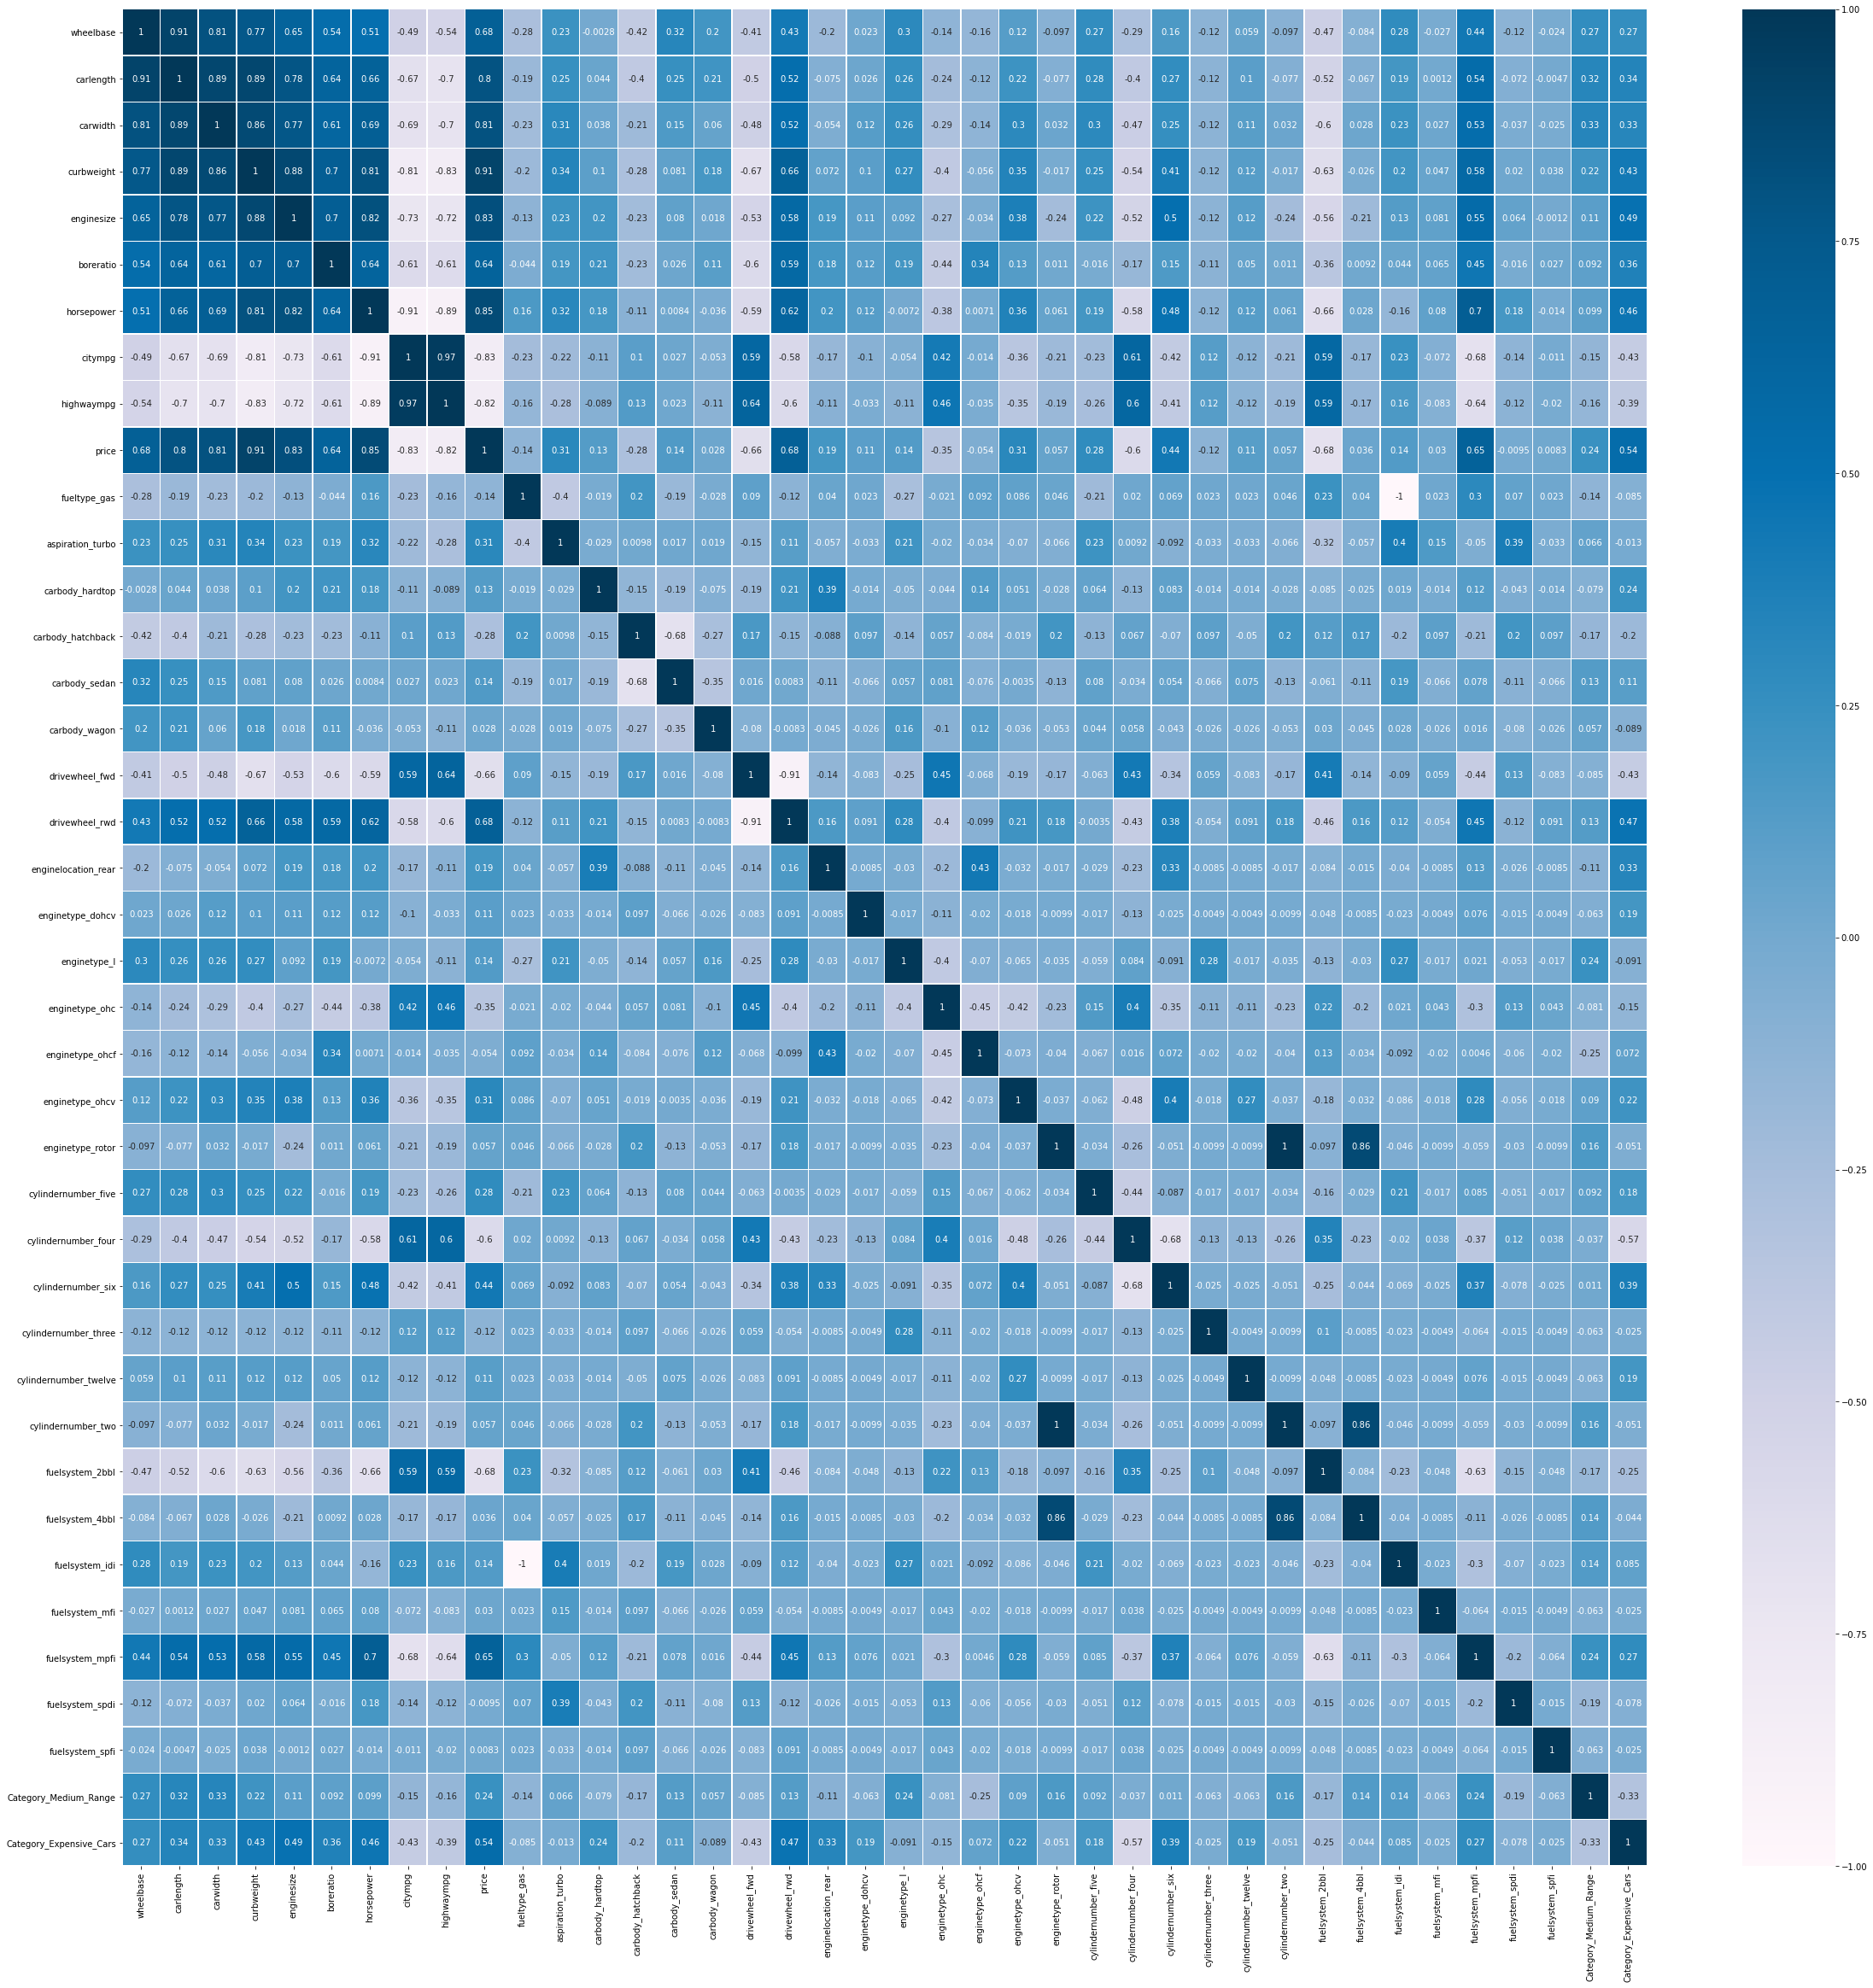

In [25]:
plt.figure(figsize = (40, 40))
sns.heatmap(df.corr(method ='pearson'), cmap='PuBu', annot=True, linewidths=.5)
plt.show()

In [26]:
df.corr(method ='pearson').unstack().sort_values().drop_duplicates()

fuelsystem_idi  fueltype_gas     -1.000000
drivewheel_fwd  drivewheel_rwd   -0.911996
citympg         horsepower       -0.910186
highwaympg      horsepower       -0.886050
curbweight      highwaympg       -0.834596
                                    ...   
                carlength         0.890398
price           curbweight        0.909040
wheelbase       carlength         0.912315
citympg         highwaympg        0.967852
wheelbase       wheelbase         1.000000
Length: 695, dtype: float64

Multicollinearity exists among predictors. After even transforming the variables, there is a strong relationships between independent variables. For this reason, I will use Variation Inflation Factor (VIF) to detect multicollinearity and to eliminate these variables from the dataset.

### Checking Pearson Correlation¶

Before eliminating correlated variables, I will check Pearson Correlation and p values. I will eliminate the features based on the accordingly.

In [28]:
data = list(df.columns)

for i in data:
    pearson_coeff, p_value = stats.pearsonr(df[i], df['price'])
    print(i.capitalize())
    print(f'Pearson Co-relation: {pearson_coeff}')
    print(f'P-Value: {p_value}')
    if p_value<0.05:
        print('Correlation is Significant')
    else:
        print('Correlation is Insignificant')
        df.drop(i, axis=1, inplace=True)
    print('')

Wheelbase
Pearson Co-relation: 0.6817107656710273
P-Value: 2.3005688205775654e-29
Correlation is Significant

Carlength
Pearson Co-relation: 0.804365794956365
P-Value: 8.702557602811746e-48
Correlation is Significant

Carwidth
Pearson Co-relation: 0.8113598824036894
P-Value: 3.1746027372805403e-49
Correlation is Significant

Curbweight
Pearson Co-relation: 0.909039833663768
P-Value: 4.118634111431946e-79
Correlation is Significant

Enginesize
Pearson Co-relation: 0.8259350805326383
P-Value: 2.0076278459246717e-52
Correlation is Significant

Boreratio
Pearson Co-relation: 0.6438697199951688
P-Value: 2.161528670735297e-25
Correlation is Significant

Horsepower
Pearson Co-relation: 0.8542299637663319
P-Value: 1.4003435627865065e-59
Correlation is Significant

Citympg
Pearson Co-relation: -0.8292981222348645
P-Value: 3.3269993007553006e-53
Correlation is Significant

Highwaympg
Pearson Co-relation: -0.822726789700766
P-Value: 1.0762462755988793e-51
Correlation is Significant

Price
Pearson

In [29]:
df.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,enginetype_ohc,enginetype_ohcv,cylindernumber_five,cylindernumber_four,cylindernumber_six,fuelsystem_2bbl,fuelsystem_idi,fuelsystem_mpfi,Category_Medium_Range,Category_Expensive_Cars
0,0.017157,0.306373,0.252451,0.580882,0.644608,0.678922,0.659314,0.301471,0.318627,0.642157,...,0,0,0,1,0,0,0,1,1,0
1,0.017157,0.306373,0.252451,0.580882,0.644608,0.678922,0.659314,0.301471,0.318627,0.742647,...,0,0,0,1,0,0,0,1,1,0
2,0.235294,0.397059,0.507353,0.705882,0.806373,0.004902,0.862745,0.200980,0.299020,0.742647,...,0,1,0,0,1,0,0,1,1,0
3,0.688725,0.644608,0.593137,0.404412,0.406863,0.375000,0.593137,0.453431,0.480392,0.671569,...,1,0,0,1,0,0,0,1,1,0
4,0.676471,0.644608,0.627451,0.710784,0.696078,0.375000,0.710784,0.127451,0.061275,0.799020,...,1,0,1,0,0,0,0,1,1,0


### Variance Inflation Factor(VIF)¶

A variance inflation factor(VIF) detects multicollinearity in regression analysis. I will select the features with VIF that is below 10

In [31]:
X =  df.drop('price', axis=1)
y = df['price']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['variables'] = X.columns

vif['vif'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
for index,column in enumerate(X.columns):
    print(index, column, vif['vif'][index])
    if vif['vif'][index] > 10:
        vif = vif.drop([index], axis=0)

0 wheelbase 9.137714066315532
1 carlength 19.32601078900026
2 carwidth 8.364084174634888
3 curbweight 26.14559927727255
4 enginesize 13.306933775206693
5 boreratio 5.690508093568953
6 horsepower 20.041177456627764
7 citympg 34.317279917659654
8 highwaympg 25.44982519061825
9 fueltype_gas 193.3945705208812
10 aspiration_turbo 3.2491600907473805
11 carbody_hatchback 3.1123100990552937
12 carbody_sedan 2.5212800338846613
13 drivewheel_fwd 9.639472284074035
14 drivewheel_rwd 10.118270711928762
15 enginelocation_rear 1.9624192280329933
16 enginetype_l 2.6901524352130193
17 enginetype_ohc 4.293225299604308
18 enginetype_ohcv 2.3992021634534124
19 cylindernumber_five 3.7877158248300464
20 cylindernumber_four 10.072734609096084
21 cylindernumber_six 4.907765843191621
22 fuelsystem_2bbl 4.421450765839344
23 fuelsystem_idi 29.62762104916423
24 fuelsystem_mpfi 4.5590959994609
25 Category_Medium_Range 2.1935592645785085
26 Category_Expensive_Cars 3.2786246433922632


### Building the Model¶

In [32]:
columns = list(vif['variables'])

data = df[columns]
data = pd.concat([data, df['price']], axis=1)

In [33]:
from sklearn.model_selection import train_test_split

X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split( X, y, train_size = 0.75, test_size=0.25, random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression().fit(X_train, y_train)

print(f'R Square Value of Test Data: {round(r2_score(y_test, model.predict(X_test))*100, 2)}%')
print(f'R Square Value of Train Data: {round(r2_score(y_train, model.predict(X_train))*100,2)}%')

R Square Value of Test Data: 85.05%
R Square Value of Train Data: 89.45%
